In [51]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt         # for saving classification in P4

In [1]:
def kimura(reference_sequence: str, distant_sequence: str) -> float:
    """The Jukes-Cantor correction for estimating genetic distances
    calculated with Hamming distance

    Parameters
    ----------
    referene_sequence: str
        A string of nucleotides in a sequence used as a reference
        in an alignment with other (i.e. ATGGC-TAG)
    distant_sequence: str
        A string of nucleotides in a sequence after the alignment
        with a reference (i.e. ATG-CTTAG)

    Returns
    -------
    float
        The Jukes-Cantor corrected genetic distance using Hamming distance.

    """
    refSeqLen = len(reference_sequence)
    distSeqLen = len(distant_sequence)
    mutationCounterTransitions = 0
    mutationCounterTransversions = 0
    extra = 0
    transitions = [("A","G"), ("G","A"),("T","C"),("C","T")]
    for i in range(min(refSeqLen,distSeqLen)):
        refEl = reference_sequence[i]
        distEl = distant_sequence[i]
        if (refEl == "-" or distEl == "-"):
            extra += 1
        else:
            if refEl != distEl:
                if (refEl,distEl) in transitions:
                    mutationCounterTransitions += 1
                else:
                    mutationCounterTransversions += 1
    print(mutationCounterTransitions)
    print("Transversions: " + str(mutationCounterTransversions))
    p = mutationCounterTransitions / (min(refSeqLen,distSeqLen) - extra)
    q = mutationCounterTransversions / (min(refSeqLen,distSeqLen) - extra)

    correctedDistance = (-1/2) * math.log((1 - 2 * p - q) * math.sqrt(1 - 2 * q))
    return correctedDistance

In [297]:
# Problem1

In [3]:
#1. Jukes Cantor

def jukes_cantor(reference_sequence: str, distant_sequence: str) -> float:
    """The Jukes-Cantor correction for estimating genetic distances
    calculated with Hamming distance

    Parameters
    ----------
    referene_sequence: str
        A string of nucleotides in a sequence used as a reference
        in an alignment with other (i.e. ATGGC-TAG)
    distant_sequence: str
        A string of nucleotides in a sequence after the alignment
        with a reference (i.e. ATG-CTTAG)

    Returns
    -------
    float
        The Jukes-Cantor corrected genetic distance using Hamming distance.

    """
    refSeqLen = len(reference_sequence)
    distSeqLen = len(distant_sequence)
    mutationCounter = 0
    extra = 0
    for i in range(min(refSeqLen,distSeqLen)):
        refEl = reference_sequence[i]
        distEl = distant_sequence[i]
        if (refEl == "-" or distEl == "-"):
            extra += 1
        else:
            if refEl != distEl:
                mutationCounter += 1
    p = mutationCounter / (min(refSeqLen,distSeqLen) - extra)
    correctedDistance = (-3.0/4.0) * math.log(1 - ((4.0/3.0) * p))
    return correctedDistance

In [15]:
# 2. Solution

def mutationDistanceScatter(file):
    c = 0
    dataList = []
    seqList = []
    with open(file,'r') as f:
        for line in f.readlines():
            if c % 2 == 0:
                dataList.append(line)
            else:
                seqList.append(line)
            c += 1

    parsedData = [] # [[naziv, lokacija, datetime, seq]]
    for elt in range(len(dataList)):
        parsedElt = dataList[elt][1:len(dataList[elt])-1].split("|")
        parsedElt[2] = pd.to_datetime(parsedElt[2])
        parsedElt.append(seqList[elt][0:len(seqList[elt])-1])
        parsedData.append(parsedElt)

    times = [] # [datetime]
    for timestep in parsedData:
        times.append(timestep[2])

    timeOfFirstInfection = min(times)

    firstVirus = []
    for elt in parsedData:
        if timeOfFirstInfection == elt[2]:
            firstVirus = elt

    jukesCantorDistances = []
    for elt in parsedData:
        jukesCantorDistances.append([jukes_cantor(firstVirus[3], elt[3]),elt[2] - timeOfFirstInfection])

    values = []
    times = []
    for elt in jukesCantorDistances:
        values.append(elt[0])
        times.append(elt[1].days)

    plt.scatter(times,values, s=3)

    # Create lin regression
    f = np.polyfit(times[1:len(times)],values[1:len(values)],1)
    # Result
    regressionLine = np.poly1d(f)

    valuesOfRegFunction = []
    for elt in times:
        valuesOfRegFunction.append(regressionLine(elt))
    plt.plot(times,valuesOfRegFunction, color = "r", label = "Regression line")
    plt.xlabel("Time elapsed")
    plt.ylabel("Genetic distance")
    plt.legend()
    mutationsPerGenomePerDay = regressionLine[1]
    muutationsPerNucleotidePerDay = regressionLine[1] / len(seqList[0])

    return [mutationsPerGenomePerDay,muutationsPerNucleotidePerDay,regressionLine]

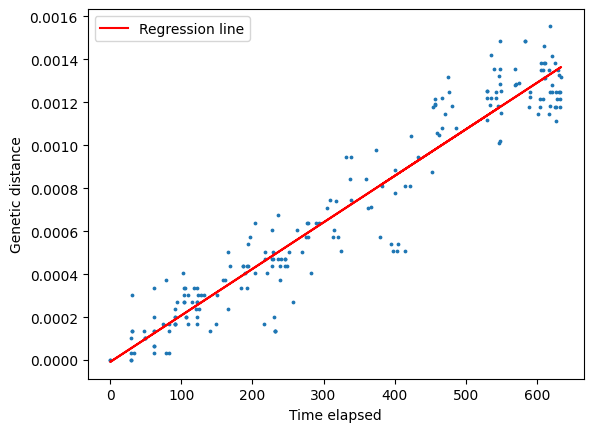

In [16]:
# 3. Finish

dataList = mutationDistanceScatter("data/p1-sars-cov-2-variants.fasta")


In [17]:
sars_cov_2_per_genome_per_day = dataList[0]
sars_cov_2_per_nt_per_day = dataList[1]

In [10]:
sars_cov_2_per_genome_per_day

2.1637873131225614e-06

In [30]:
sars_cov_2_per_nt_per_day

7.285572271181647e-11

In [ ]:
# Problem2

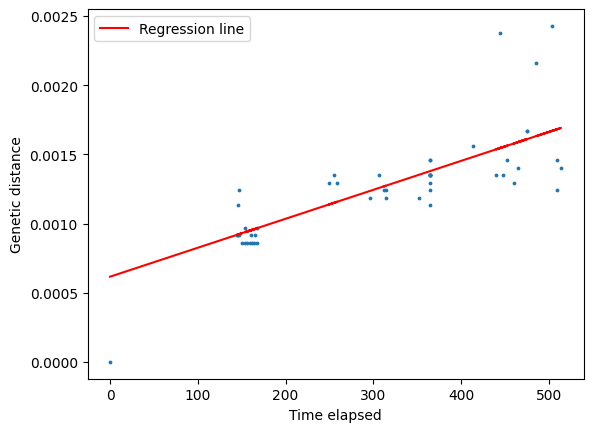

In [18]:
# Ebola
ebolaData = mutationDistanceScatter("data/p2-ebola-viruses.fasta")

In [20]:
# Ebola finish
ebola_per_genome_per_day = ebolaData[0]
ebola_per_nt_per_day = ebolaData[1]

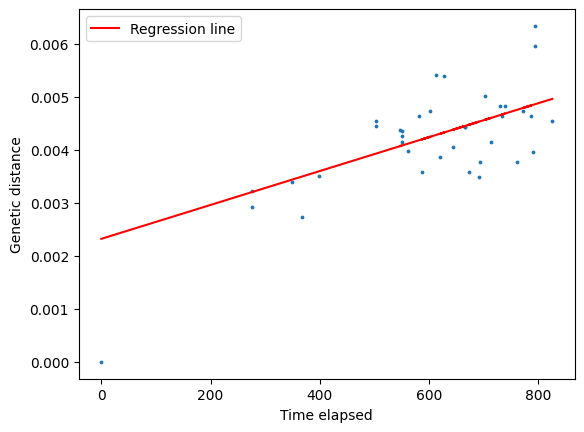

In [21]:
# Zika
zikaData = mutationDistanceScatter("data/p2-zika-viruses.fasta")

In [22]:
# Zika finish
zika_per_genome_per_day = zikaData[0]
zika_per_nt_per_day = zikaData[1]

In [23]:
print("SarsCov genome per day: " + str(sars_cov_2_per_genome_per_day))
print("Zika genome per day: " + str(zika_per_genome_per_day))
print("Ebola genome per day: " + str(ebola_per_genome_per_day))

SarsCov genome per day: 2.1637873131225614e-06
Zika genome per day: 3.1971576332302502e-06
Ebola genome per day: 2.0918446638690037e-06


In [24]:
print("SarsCov nucleotide per day: " + str(sars_cov_2_per_nt_per_day))
print("Zika nucleotide per day: " + str(zika_per_nt_per_day))
print("Ebola nucleotide per day: " + str(ebola_per_nt_per_day))

SarsCov nucleotide per day: 7.284498091578782e-11
Zika nucleotide per day: 3.012491880929285e-10
Ebola nucleotide per day: 1.1268893303178386e-10


In [71]:
# Finish
mutation_comments = """
    Comparing SarsCov2 only to Zika and Ebola shows us that covid is on the slower side of mutations, it also has less mutations per nucleotide than both viruses. 
    Zika virus stands out as it is the one that mutates the fastest compared to Ebola and SarsCov2. SarsCov2s slow mutation rate could be atributed to its self correcting mechanism.
"""

In [27]:
# 3. Naloga 
gene_locations = {
    'S': (21462, 25284),
    'E': (26144, 26372),
    'M': (26422, 27091),
    'N': (28173, 29433)
}

alpha_variants  = ['EPI_ISL_2789189', 'EPI_ISL_2789042', 'EPI_ISL_1491060', 'EPI_ISL_1402029', 'EPI_ISL_6950370',
                    'EPI_ISL_1625411', 'EPI_ISL_1335421', 'EPI_ISL_2644151', 'EPI_ISL_2982899', 'EPI_ISL_2644156',
                    'EPI_ISL_2788965', 'EPI_ISL_2789059', 'EPI_ISL_2532608', 'EPI_ISL_2644516', 'EPI_ISL_2886579',
                    'EPI_ISL_3316487', 'EPI_ISL_2886574', 'EPI_ISL_2532626', 'EPI_ISL_2886496', 'EPI_ISL_2492172',
                    'EPI_ISL_2644108', 'EPI_ISL_1402024', 'EPI_ISL_2492224', 'EPI_ISL_2491984', 'EPI_ISL_2789018',
                    'EPI_ISL_2886831', 'EPI_ISL_1491132', 'EPI_ISL_2492034', 'EPI_ISL_1266392', 'EPI_ISL_2983056']

delta_variants = ['EPI_ISL_3039380', 'EPI_ISL_4271386', 'EPI_ISL_5213082', 'EPI_ISL_3316705','EPI_ISL_3316997',
                    'EPI_ISL_4251175', 'EPI_ISL_3471254', 'EPI_ISL_4271571', 'EPI_ISL_4270964', 'EPI_ISL_3317189',
                    'EPI_ISL_3829145', 'EPI_ISL_3317102', 'EPI_ISL_4923915', 'EPI_ISL_3829384', 'EPI_ISL_4923898',
                    'EPI_ISL_4270689', 'EPI_ISL_4270627', 'EPI_ISL_3828666', 'EPI_ISL_4253193', 'EPI_ISL_3828993',
                    'EPI_ISL_3039412', 'EPI_ISL_4923029', 'EPI_ISL_4251446', 'EPI_ISL_4271300', 'EPI_ISL_4271597',
                    'EPI_ISL_4271322', 'EPI_ISL_4922967', 'EPI_ISL_4251202', 'EPI_ISL_4251164', 'EPI_ISL_4270961',
                    'EPI_ISL_4270530', 'EPI_ISL_4270924', 'EPI_ISL_3829530', 'EPI_ISL_3828321', 'EPI_ISL_4271408',
                    'EPI_ISL_4271598', 'EPI_ISL_4924026', 'EPI_ISL_3316743']

In [28]:
# 1. Preparing data
c = 0
dataList = []
seqList = []
with open("data/p1-sars-cov-2-variants.fasta",'r') as f:
    for line in f.readlines():
        if c % 2 == 0:
            dataList.append(line)
        else:
            seqList.append(line)
        c += 1

parsedData = [] # [[naziv, lokacija, datetime, seq]]
for elt in range(len(dataList)):
    parsedElt = dataList[elt][1:len(dataList[elt])-1].split("|")
    parsedElt[2] = pd.to_datetime(parsedElt[2])
    parsedElt.append(seqList[elt][0:len(seqList[elt])-1])
    parsedData.append(parsedElt)

times = [] # [datetime]
for timestep in parsedData:
    times.append(timestep[2])

timeOfFirstInfection = min(times)

firstVirus = []
for elt in parsedData:
    if timeOfFirstInfection == elt[2]:
        firstVirus = elt

alpha_parsedVariants = []
delta_parsedVariants = []

for elt in parsedData:
    if elt[0] in alpha_variants:
        alpha_parsedVariants.append(elt)
    elif elt[0] in delta_variants:
        delta_parsedVariants.append(elt)

In [29]:
# 2. Get mutation occurances

def findMutationOccurances(variants, firstVirus):
    hDistancesNuc = []
    for x in variants:
        nucDistance = []
        virus = x[3]
        for elt in range(len(virus)):
            nucDistance.append(d(firstVirus[3][elt], virus[elt]))
        hDistancesNuc.append(nucDistance)
    finalNucDistances = hDistancesNuc[0]
    for i in range(1, len(hDistancesNuc)):
        for j in range(len(hDistancesNuc[i])):
            finalNucDistances[j] += hDistancesNuc[i][j] 
    for i in range(len(finalNucDistances)):
        finalNucDistances[i] = finalNucDistances[i] / len(hDistancesNuc)    
    return finalNucDistances

def d(n1, n2):
	if n1 == n2:
		return 0
	else:
		return 1

alphaMutationOccurances = findMutationOccurances(alpha_parsedVariants, firstVirus)
deltaMutationOccurances = findMutationOccurances(delta_parsedVariants, firstVirus)

In [34]:
len(deltaMutationOccurances)

29703

Text(0.5, 0.01, 'Mutation occurances')

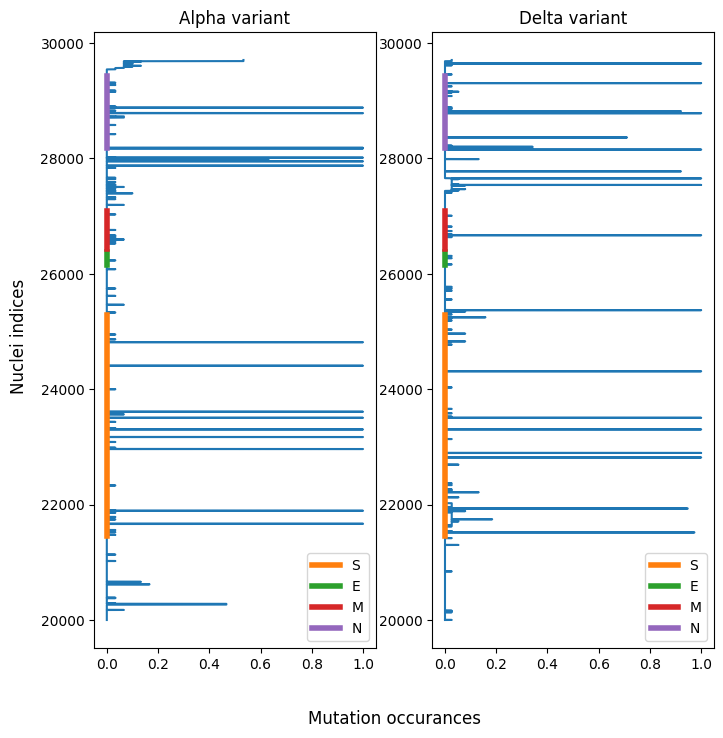

In [48]:
# 4. Plot finish
figure, figures = plt.subplots(1, 2,figsize=(8, 8))
axis = [i for i in range(20000, len(deltaMutationOccurances))]
figures[0].plot(alphaMutationOccurances[20000:len(alphaMutationOccurances)],axis)
figures[0].plot((0,0),(21462, 25284), label = "S", linewidth = 4)
figures[0].plot((0,0),(26144, 26372),label = "E", linewidth = 4)
figures[0].plot((0,0),(26422, 27091),label = "M", linewidth = 4)
figures[0].plot((0,0),(28173, 29433),label = "N", linewidth = 4)
figures[0].legend(loc = "lower right")

figures[1].plot(deltaMutationOccurances[20000:len(deltaMutationOccurances)],axis)
figures[1].plot((0,0),(21462, 25284), label = "S", linewidth = 4)
figures[1].plot((0,0),(26144, 26372),label = "E", linewidth = 4)
figures[1].plot((0,0),(26422, 27091),label = "M", linewidth = 4)
figures[1].plot((0,0),(28173, 29433),label = "N", linewidth = 4)
figures[1].legend(loc = "lower right")
figures[0].set_title("Alpha variant")
figures[1].set_title("Delta variant")
figure.supylabel("Nuclei indices")
figure.supxlabel("Mutation occurances")


In [302]:
# 5. Same mutations
vitalMutations = []
sameMutation = ""
for i in range(21462,25284):
    # finds vital mutations on both nucleotides
    if alphaMutationOccurances[i] >= 0.5 and deltaMutationOccurances[i] >= 0.5:
        vitalMutations.append(i)
    # finds the same mutation
    if alphaMutationOccurances[i] == 1 and deltaMutationOccurances[i] == 1 and delta_parsedVariants[0][3][i] == alpha_parsedVariants[0][3][i]:
        sameMutation = i

In [290]:
# 6. Mutations in both variants finish
mutations_in_both_variants = [23302,23503]
same_mutation = "A23302G"

In [305]:
variant_comments="""
    Since there is a low ammount of vital mutations in both variants I would say delta evolved independently. 
    Sites with no detected mutations are part of original sequence dna.
"""

In [ ]:
# 4. naloga

In [317]:
import json
import csv

variants = {}
f = open('data/variants.json')
data = json.load(f)
for variant in data:
    nonsynonymous = []
    for gene in data[variant]["nonsynonymous"]:
        nonsynonymous.append(gene)
    variants[variant] = nonsynonymous
f.close()
dataList = []
seqList = []
with open("data/p4-slo-spike-proteins.fasta",'r') as f:
    for line in f.readlines():
        if c % 2 == 0:
            dataList.append(line)
        else:
            seqList.append(line)
        c += 1

parsedData = [] # [[naziv, lokacija, datetime, seq]]
for elt in range(len(dataList)):
    parsedElt = dataList[elt][1:len(dataList[elt])-1].split("|")
    parsedElt[2] = pd.to_datetime(parsedElt[2])
    parsedElt.append(seqList[elt][0:len(seqList[elt])-1])
    parsedData.append(parsedElt)

In [310]:
def takeThird(elt):
    return elt[2]
parsedData.sort(key = takeThird)


In [318]:
def parseMutations(mutations):

    mutations2 = []
    for x in mutations:
        if x['gene'] == 'S':
            mutations2.append(x)
    return mutations2

In [319]:
def getBestMatchingSpikeName(mutations):
    mutations = parseMutations(mutations)
    maxImena = []
    maxVsote = 0
    vsota = 0
    for x in parsedData:
        vsota = 0
        sequence = x[3]
        stMutacij = len(mutations)
        for mut in mutations:
            gene = mut['gene']
            pos = mut['pos'] - 1
            mutatedIn = mut['right']
            if sequence[pos] == mutatedIn:
                vsota += 1
        vsota = vsota / stMutacij
        maxImena.append([vsota,x[1]]) 
    return [maxImena]

In [320]:
assignedMutations = {}
noMutations = []
for key in variants.keys():
    mutationList = variants[key]
    [maxVal] = getBestMatchingSpikeName(mutationList)
    assignedMutations[key] = maxVal
for x in parsedData:
    ime = x[1]
    obstaja = False
    for y in assignedMutations:
        for i in y:
            if ime in i:
                obstaja = True
    if obstaja == False:
        noMutations.append(ime)

In [321]:
mutacije = {}
for x in assignedMutations.keys():
    for elt in assignedMutations[x]:
        if elt[1] not in mutacije.keys():
            mutacije[elt[1]] = [x, elt[0]]
        else:
            if mutacije[elt[1]][1] < elt[0]:
                mutacije[elt[1]] = [x, elt[0]]
for x in mutacije.keys():
    if mutacije[x][1] <= 0.5:
        mutacije[x] = ["UNKNOWN", mutacije[x][1]]
    if mutacije[x][1] == 0:
        print(x)
        mutacije[x] = ["NO_MUTATIONS", mutacije[x][1]]                

In [322]:
file = open('problem4-classification.csv', 'w', newline = "")
writer = csv.writer(file)
for x in mutacije.keys():
    id = x
    variant = mutacije[x][0]
    writer.writerow([str(id),variant])
file.close()

In [323]:
plot_data = []


In [324]:
for x in mutacije.keys():
    id = x
    variant = mutacije[x][0]
    for elt in parsedData:
        if elt[1] == id:
            
            plot_data.append([variant, elt[2].to_period('M')])

In [325]:
def takeSec(elt):
    return elt[1]
plot_data.sort(key = takeSec)

In [326]:
sezDatumov = []
sezVarjant = []

In [327]:
for elt in plot_data:
    if elt[1] not in sezDatumov:
        sezDatumov.append(elt[1])
    if elt[0] not in sezVarjant:
        sezVarjant.append(elt[0])

In [328]:
fin = []
for variant in sezVarjant:
    tmp = []
    for datum in sezDatumov:
        vsota = 0
        for elt in plot_data:
            if elt[0] == variant and elt[1] == datum:
                vsota += 1
        tmp.append(vsota)

    fin.append(tmp)

In [329]:
vsote = []
for x in range(len(fin[0])):
    vsota = 0
    for elt in range(len(fin)):
        vsota += fin[elt][x] 
    vsote.append(vsota)


In [330]:
for x in range(len(vsote)):
    for elt in range(len(fin)):
        fin[elt][x] = fin[elt][x] / vsote[x]

In [331]:
final_plot_data = []

In [332]:
for elt in range(len(sezDatumov)):
    sezDatumov[elt] = str(sezDatumov[elt])

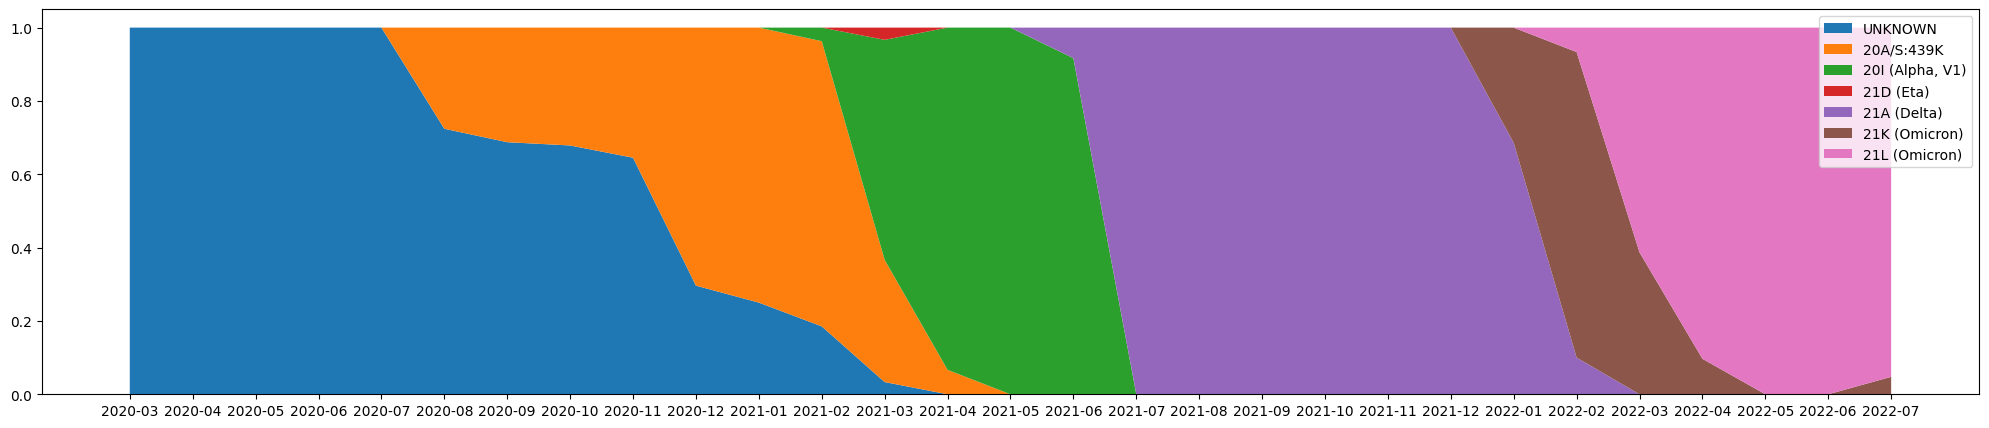

In [333]:
plt.figure(figsize=(25, 5))
plt.stackplot(sezDatumov, fin, labels = sezVarjant)
plt.legend()


In [ ]:
# 5. naloga

In [49]:
def mutationDistanceScatterKimura(file):
    c = 0
    dataList = []
    seqList = []
    with open(file,'r') as f:
        for line in f.readlines():
            if c % 2 == 0:
                dataList.append(line)
            else:
                seqList.append(line)
            c += 1

    parsedData = [] # [[naziv, lokacija, datetime, seq]]
    for elt in range(len(dataList)):
        parsedElt = dataList[elt][1:len(dataList[elt])-1].split("|")
        parsedElt[2] = pd.to_datetime(parsedElt[2])
        parsedElt.append(seqList[elt][0:len(seqList[elt])-1])
        parsedData.append(parsedElt)

    times = [] # [datetime]
    for timestep in parsedData:
        times.append(timestep[2])

    timeOfFirstInfection = min(times)

    firstVirus = []
    for elt in parsedData:
        if timeOfFirstInfection == elt[2]:
            firstVirus = elt

    jukesCantorDistances = []
    for elt in parsedData:
        jukesCantorDistances.append([kimura(firstVirus[3], elt[3]),elt[2] - timeOfFirstInfection])

    values = []
    times = []
    for elt in jukesCantorDistances:
        values.append(elt[0])
        times.append(elt[1].days)

    plt.scatter(times,values, s=3)

    # Create lin regression
    f = np.polyfit(times[1:len(times)],values[1:len(values)],1)
    # Result
    regressionLine = np.poly1d(f)

    valuesOfRegFunction = []
    for elt in times:
        valuesOfRegFunction.append(regressionLine(elt))
    plt.plot(times,valuesOfRegFunction, color = "r")
    
    mutationsPerGenomePerDay = regressionLine[1]
    muutationsPerNucleotidePerDay = regressionLine[1] / len(seqList[0])

    return [mutationsPerGenomePerDay,muutationsPerNucleotidePerDay,regressionLine]

22
Transversions: 13
19
Transversions: 18
20
Transversions: 14
23
Transversions: 12
19
Transversions: 13
22
Transversions: 13
23
Transversions: 13
25
Transversions: 11
23
Transversions: 17
25
Transversions: 15
18
Transversions: 12
27
Transversions: 17
22
Transversions: 13
25
Transversions: 14
22
Transversions: 12
23
Transversions: 14
25
Transversions: 13
28
Transversions: 14
29
Transversions: 11
20
Transversions: 13
22
Transversions: 14
23
Transversions: 12
25
Transversions: 12
25
Transversions: 12
18
Transversions: 12
23
Transversions: 14
23
Transversions: 16
22
Transversions: 14
23
Transversions: 13
24
Transversions: 14
25
Transversions: 13
30
Transversions: 16
24
Transversions: 15
20
Transversions: 16
20
Transversions: 14
21
Transversions: 18
24
Transversions: 11
23
Transversions: 19
27
Transversions: 13
23
Transversions: 13
22
Transversions: 15
22
Transversions: 15
23
Transversions: 13
24
Transversions: 16
23
Transversions: 12
23
Transversions: 13
23
Transversions: 14
24
Transversi

[2.1639846612874945e-06,
 7.285162474035465e-11,
 poly1d([ 2.16398466e-06, -8.41441648e-06])]

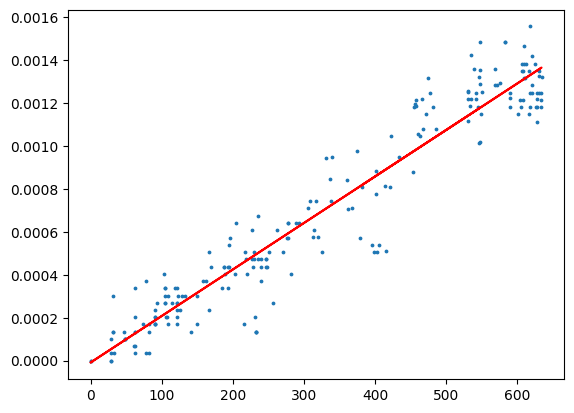

In [50]:
mutationDistanceScatterKimura("data/p1-sars-cov-2-variants.fasta")